In [1]:
import pandas as pd

from io import StringIO

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import ScalarFormatter

In [3]:
import matplotlib

In [4]:
matplotlib.rc('font', size=20)

In [5]:
orig_text = """
                                                       oof_rocauc_score                                                         test_rocauc_score                                                        
                                                                   mean t_int_l t_int_h    std                           values              mean t_int_l t_int_h    std                           values
name                                                                                                                                                                                                     
lgb_embeds: emb__hidden_size_bs_0128_hs_0032.pickle              0.8296  0.8110  0.8482 0.0134  [0.808 0.826 0.837 0.837 0.841]            0.8118  0.8078  0.8159 0.0029  [0.808 0.810 0.812 0.814 0.815]
lgb_embeds: emb__hidden_size_bs_0128_hs_0064.pickle              0.8553  0.8331  0.8776 0.0160  [0.828 0.853 0.861 0.867 0.867]            0.8555  0.8503  0.8607 0.0037  [0.851 0.852 0.857 0.857 0.861]
lgb_embeds: emb__hidden_size_bs_0128_hs_0128.pickle              0.8652  0.8436  0.8868 0.0155  [0.841 0.862 0.865 0.877 0.881]            0.8669  0.8639  0.8699 0.0021  [0.864 0.866 0.867 0.868 0.869]
lgb_embeds: emb__hidden_size_bs_0128_hs_0256.pickle              0.8710  0.8508  0.8911 0.0145  [0.852 0.864 0.869 0.882 0.888]            0.8712  0.8677  0.8747 0.0025  [0.868 0.870 0.870 0.873 0.874]
lgb_embeds: emb__hidden_size_bs_0128_hs_0512.pickle              0.8738  0.8556  0.8919 0.0131  [0.855 0.870 0.870 0.886 0.887]            0.8715  0.8657  0.8773 0.0042  [0.866 0.870 0.871 0.872 0.878]
lgb_embeds: emb__hidden_size_bs_0128_hs_1024.pickle              0.8740  0.8584  0.8895 0.0112  [0.859 0.868 0.873 0.882 0.888]            0.8742  0.8720  0.8764 0.0016  [0.872 0.874 0.874 0.876 0.876]
lgb_embeds: emb__hidden_size_bs_0128_hs_2048.pickle              0.8742  0.8561  0.8923 0.0130  [0.856 0.871 0.871 0.883 0.890]            0.8757  0.8725  0.8789 0.0023  [0.874 0.874 0.875 0.876 0.879]
lgb_embeds: emb__hidden_size_bs_0128_hs_3072.pickle              0.8559  0.8443  0.8675 0.0083  [0.842 0.856 0.859 0.861 0.862]            0.8579  0.8537  0.8621 0.0030  [0.853 0.858 0.858 0.860 0.861]
linear_embeds: emb__hidden_size_bs_0128_hs_0032.pickle           0.8231  0.8008  0.8454 0.0161  [0.797 0.820 0.828 0.833 0.837]            0.8174  0.8162  0.8187 0.0009  [0.817 0.817 0.817 0.818 0.819]
linear_embeds: emb__hidden_size_bs_0128_hs_0064.pickle           0.8510  0.8282  0.8738 0.0164  [0.823 0.849 0.856 0.862 0.864]            0.8538  0.8521  0.8554 0.0012  [0.852 0.854 0.854 0.855 0.855]
linear_embeds: emb__hidden_size_bs_0128_hs_0128.pickle           0.8643  0.8458  0.8828 0.0133  [0.845 0.858 0.866 0.875 0.878]            0.8639  0.8627  0.8650 0.0008  [0.863 0.863 0.864 0.864 0.865]
linear_embeds: emb__hidden_size_bs_0128_hs_0256.pickle           0.8677  0.8474  0.8880 0.0146  [0.845 0.865 0.868 0.876 0.884]            0.8686  0.8674  0.8698 0.0009  [0.867 0.869 0.869 0.869 0.869]
linear_embeds: emb__hidden_size_bs_0128_hs_0512.pickle           0.8674  0.8496  0.8852 0.0128  [0.848 0.864 0.867 0.879 0.879]            0.8716  0.8683  0.8749 0.0024  [0.869 0.869 0.872 0.874 0.874]
linear_embeds: emb__hidden_size_bs_0128_hs_1024.pickle           0.8657  0.8497  0.8817 0.0116  [0.851 0.859 0.867 0.870 0.881]            0.8638  0.8601  0.8676 0.0027  [0.860 0.863 0.864 0.866 0.867]
linear_embeds: emb__hidden_size_bs_0128_hs_2048.pickle           0.8576  0.8414  0.8738 0.0117  [0.841 0.854 0.857 0.864 0.872]            0.8678  0.8582  0.8773 0.0069  [0.858 0.864 0.869 0.874 0.874]
linear_embeds: emb__hidden_size_bs_0128_hs_3072.pickle           0.8487  0.8333  0.8641 0.0111  [0.831 0.844 0.854 0.855 0.859]            0.8519  0.8453  0.8585 0.0047  [0.847 0.850 0.851 0.852 0.860]
xgb_embeds: emb__hidden_size_bs_0128_hs_0032.pickle              0.8246  0.8032  0.8460 0.0154  [0.800 0.823 0.825 0.835 0.839]            0.8091  0.8054  0.8129 0.0027  [0.805 0.809 0.809 0.810 0.813]
xgb_embeds: emb__hidden_size_bs_0128_hs_0064.pickle              0.8471  0.8235  0.8706 0.0170  [0.819 0.843 0.854 0.859 0.860]            0.8481  0.8450  0.8512 0.0023  [0.845 0.847 0.848 0.849 0.851]
xgb_embeds: emb__hidden_size_bs_0128_hs_0128.pickle              0.8625  0.8458  0.8791 0.0120  [0.844 0.860 0.863 0.869 0.877]            0.8600  0.8543  0.8657 0.0041  [0.855 0.859 0.859 0.863 0.865]
xgb_embeds: emb__hidden_size_bs_0128_hs_0256.pickle              0.8626  0.8407  0.8845 0.0158  [0.843 0.854 0.861 0.873 0.883]            0.8625  0.8553  0.8697 0.0052  [0.857 0.858 0.862 0.867 0.869]
xgb_embeds: emb__hidden_size_bs_0128_hs_0512.pickle              0.8655  0.8482  0.8828 0.0124  [0.847 0.861 0.866 0.876 0.877]            0.8665  0.8640  0.8691 0.0018  [0.864 0.865 0.867 0.868 0.869]
xgb_embeds: emb__hidden_size_bs_0128_hs_1024.pickle              0.8649  0.8496  0.8802 0.0110  [0.851 0.857 0.866 0.870 0.880]            0.8737  0.8699  0.8775 0.0027  [0.870 0.873 0.874 0.876 0.877]
xgb_embeds: emb__hidden_size_bs_0128_hs_2048.pickle              0.8687  0.8551  0.8823 0.0098  [0.856 0.866 0.867 0.871 0.883]            0.8665  0.8601  0.8728 0.0046  [0.861 0.862 0.868 0.869 0.872]
xgb_embeds: emb__hidden_size_bs_0128_hs_3072.pickle              0.8482  0.8365  0.8599 0.0084  [0.833 0.849 0.852 0.853 0.853]            0.8493  0.8411  0.8575 0.0059  [0.843 0.844 0.848 0.855 0.856]
"""

In [6]:
col_stats = ['mean', 't_int_l', 't_int_h', 'std'] + [f'{i}' for i in range(5)]

In [7]:
df = pd.read_fwf(StringIO(orig_text)).iloc[3:]
df.columns = ['name'] + [f'{k}.{n}' for k in ['valid', 'test'] for n in col_stats]

In [8]:
df = pd.concat([
    df['name'].str.extract(
        r'(?P<model_type>\w+): emb__hidden_size_bs_(?P<batch_size>\d+)_hs_(?P<hidden_size>\d+)\.pickle'),
    df
], axis=1)

In [9]:
for col, dt in df.dtypes.iteritems():
    if col in ('name', 'model_type'):
        continue
    if dt == 'float':
        continue
    df[col] = pd.to_numeric(df[col].str.strip('[').str.strip(']'))

In [10]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: lightyellow' if v else '' for v in is_max]

def highlight_values(v):
    return 'background-color: lightyellow' if not pd.isna(v) else ''

In [11]:
df.pivot_table(index=['batch_size', 'hidden_size'], columns='model_type', values='valid.mean') \
    .style.apply(highlight_max, axis=1)

In [12]:
df.pivot_table(index='hidden_size', columns='batch_size', values='valid.mean', aggfunc='mean').round(3) \
    .style.applymap(highlight_values)

batch_size,128
hidden_size,
32,0.826
64,0.851
128,0.864
256,0.867
512,0.869
1024,0.868
2048,0.867
3072,0.851


In [14]:
df2 = pd.melt(
    df,
    id_vars=['model_type', 'batch_size', 'hidden_size', 'name'],
    var_name='fold_n',
    value_vars=[f'valid.{i}' for i in range(5)],
    value_name='Test AUROC',
)

In [15]:
df2

,model_type,batch_size,hidden_size,name,fold_n,Test AUROC
0,lgb_embeds,128,32,lgb_embeds: emb__hidden_size_bs_0128_hs_0032.p...,valid.0,0.808
1,lgb_embeds,128,64,lgb_embeds: emb__hidden_size_bs_0128_hs_0064.p...,valid.0,0.828
2,lgb_embeds,128,128,lgb_embeds: emb__hidden_size_bs_0128_hs_0128.p...,valid.0,0.841
3,lgb_embeds,128,256,lgb_embeds: emb__hidden_size_bs_0128_hs_0256.p...,valid.0,0.852
4,lgb_embeds,128,512,lgb_embeds: emb__hidden_size_bs_0128_hs_0512.p...,valid.0,0.855
...,...,...,...,...,...,...
115,xgb_embeds,128,256,xgb_embeds: emb__hidden_size_bs_0128_hs_0256.p...,valid.4,0.883
116,xgb_embeds,128,512,xgb_embeds: emb__hidden_size_bs_0128_hs_0512.p...,valid.4,0.877
117,xgb_embeds,128,1024,xgb_embeds: emb__hidden_size_bs_0128_hs_1024.p...,valid.4,0.880
118,xgb_embeds,128,2048,xgb_embeds: emb__hidden_size_bs_0128_hs_2048.p...,valid.4,0.883


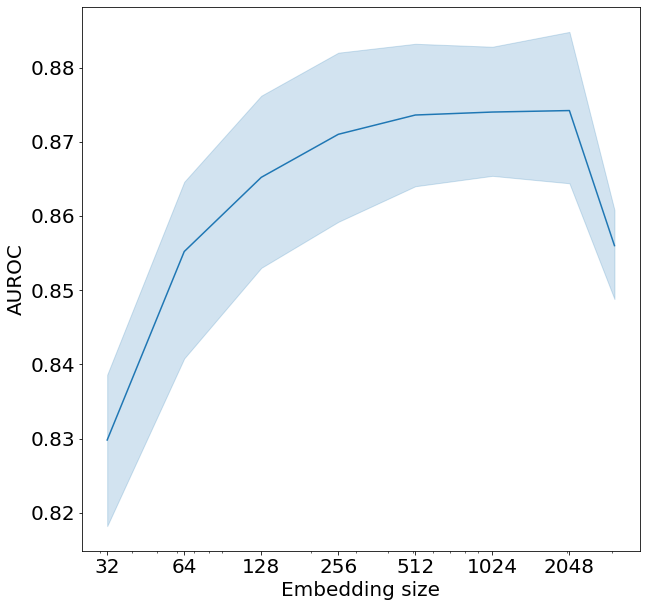

In [16]:
plt.figure(figsize=(10, 10))
ax = sns.lineplot(
    x='Embedding size',
    y='AUROC',
    palette='tab10',
    data=df2[lambda x: x['model_type'].eq('lgb_embeds')]
    [lambda x: x['batch_size'].isin((128, ))]
    .rename(columns={'hidden_size': 'Embedding size', 'Test AUROC': 'AUROC'}),
    ci=95,
)
# plt.title('Gender prediction task')
ax.set_xscale('log'),
ax.set_xticks([2 ** i for i in range(5, 12)])
ax.get_xaxis().set_major_formatter(ScalarFormatter())

# plt.axhline(df['valid.mean'].quantile(0.99), color='black', linestyle='--', linewidth=1)
# plt.axhspan(0.8626, 0.8875, alpha=0.1, color='black')
# plt.grid()
# plt.show()

plt.savefig('gender-hidden-size.pdf', format='pdf', bbox_inches='tight')